In [1]:
!pip uninstall opencv-python -y
!pip uninstall numpy -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


You can safely remove it manually.


In [4]:
!pip install numpy==1.23.5
!pip install opencv-python==4.7.0.72

  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
   ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.2 MB 13.4 MB/s eta 0:00:03
   ---------- ----------------------------- 10.0/38.2 MB 24.9 MB/s eta 0:00:02
   ---------------------------------- ----- 33.0/38.2 MB 53.8 MB/s eta 0:00:01
   ---------------------------------------- 38.2/38.2 MB 48.5 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint


In [6]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()

X_train[0:1]

11490434/11490434 [==============================] - 1s 0us/step


array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [7]:
X_train=X_train/255.0
X_test= X_test/255.0
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flat=X_train.reshape(-1,28*28)
X_train_flat.shape

(60000, 784)

In [9]:
X_test_flat = X_test.reshape(-1,28*28)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,input_shape=(784,),kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),tf.keras.layers.ReLU(),tf.keras.layers.Dropout(0.5),tf.keras.layers.Dense(512,kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),tf.keras.layers.ReLU(),tf.keras.layers.Dropout(0.5),tf.keras.layers.Dense(256,kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),tf.keras.layers.ReLU(),tf.keras.layers.Dropout(0.5),tf.keras.layers.Dense(10,kernel_initializer='glorot_uniform',activation='softmax')

])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',metrics=['accuracy']
             )

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=3,verbose=1,min_lr=1e-6)
checkpoint = ModelCheckpoint('best_model.h5',monitor = 'val_loss',save_best_only=True,verbose=1)


In [14]:
model.fit(
    X_train_flat,Y_train,epochs=30,batch_size=2048,validation_data=(X_test_flat,Y_test),callbacks=[reduce_lr,checkpoint]
)

Epoch 1/30
29/30 [============================>.] - ETA: 0s - loss: 0.9285 - accuracy: 0.7052
Epoch 1: val_loss improved from inf to 0.37739, saving model to best_model.h5
30/30 [==============================] - 3s 59ms/step - loss: 0.9238 - accuracy: 0.7068 - val_loss: 0.3774 - val_accuracy: 0.8881 - lr: 0.0010
Epoch 2/30
29/30 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8982
Epoch 2: val_loss improved from 0.37739 to 0.20167, saving model to best_model.h5
30/30 [==============================] - 2s 55ms/step - loss: 0.3390 - accuracy: 0.8985 - val_loss: 0.2017 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 3/30
29/30 [============================>.] - ETA: 0s - loss: 0.2561 - accuracy: 0.9245
Epoch 3: val_loss improved from 0.20167 to 0.16184, saving model to best_model.h5
30/30 [==============================] - 2s 55ms/step - loss: 0.2565 - accuracy: 0.9243 - val_loss: 0.1618 - val_accuracy: 0.9541 - lr: 0.0010
Epoch 4/30
29/30 [============================>

In [15]:
loss,accuracy=model.evaluate(X_test_flat,Y_test,batch_size=2048)
print(f'테스트 정확도:{accuracy*100:.2f}%')

5/5 [==============================] - 0s 12ms/step - loss: 0.0596 - accuracy: 0.9838
테스트 정확도:98.38%


In [16]:
idx=np.random.choice(len(X_test_flat),32,replace=False)
idx

array([5559, 1619, 5073, 8914, 2012, 6912, 4907, 8896, 5166, 1247, 8065,
       8909, 1019, 8575, 6257, 1716, 8215, 2072, 4234, 6175, 5670, 4961,
        716, 5599, 9515, 3368, 2993, 7625, 7072, 2553, 7454, 4678])

In [17]:
X_sample= X_test_flat[idx]
X_sample[0:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [18]:
Y_sample=Y_test[idx]
Y_sample[0:1]

array([4], dtype=uint8)

In [20]:
predictions=model.predict(
    X_sample
)
predictions

1/1 [==============================] - 0s 83ms/step


array([[1.39524718e-06, 1.96490964e-06, 5.05655237e-07, 2.10388293e-08,
        9.99930382e-01, 2.31125298e-07, 6.95793403e-07, 4.87556053e-06,
        3.64470232e-08, 5.97635953e-05],
       [9.99981999e-01, 3.48406708e-08, 1.88075933e-06, 6.94210982e-08,
        3.78728231e-08, 1.17220634e-06, 1.07467176e-05, 2.29335774e-06,
        3.56197631e-07, 1.42553267e-06],
       [1.35387879e-09, 4.58003878e-11, 1.24430466e-10, 1.98969641e-08,
        1.24274706e-07, 6.68685107e-10, 1.58653663e-11, 3.85022894e-08,
        9.85418414e-09, 9.99999762e-01],
       [2.96125435e-09, 9.99998569e-01, 1.07236538e-07, 1.68328917e-09,
        4.20937340e-07, 5.55433299e-09, 4.03270022e-08, 7.78031165e-07,
        4.17259258e-08, 5.99625460e-10],
       [5.43122258e-09, 1.02472612e-07, 1.00351132e-08, 1.25151889e-10,
        9.99999642e-01, 4.13798462e-09, 2.96792413e-09, 3.73399800e-08,
        6.01244610e-09, 2.56315360e-07],
       [3.99362193e-07, 2.79070591e-05, 9.99887943e-01, 1.68360257e-05,
   

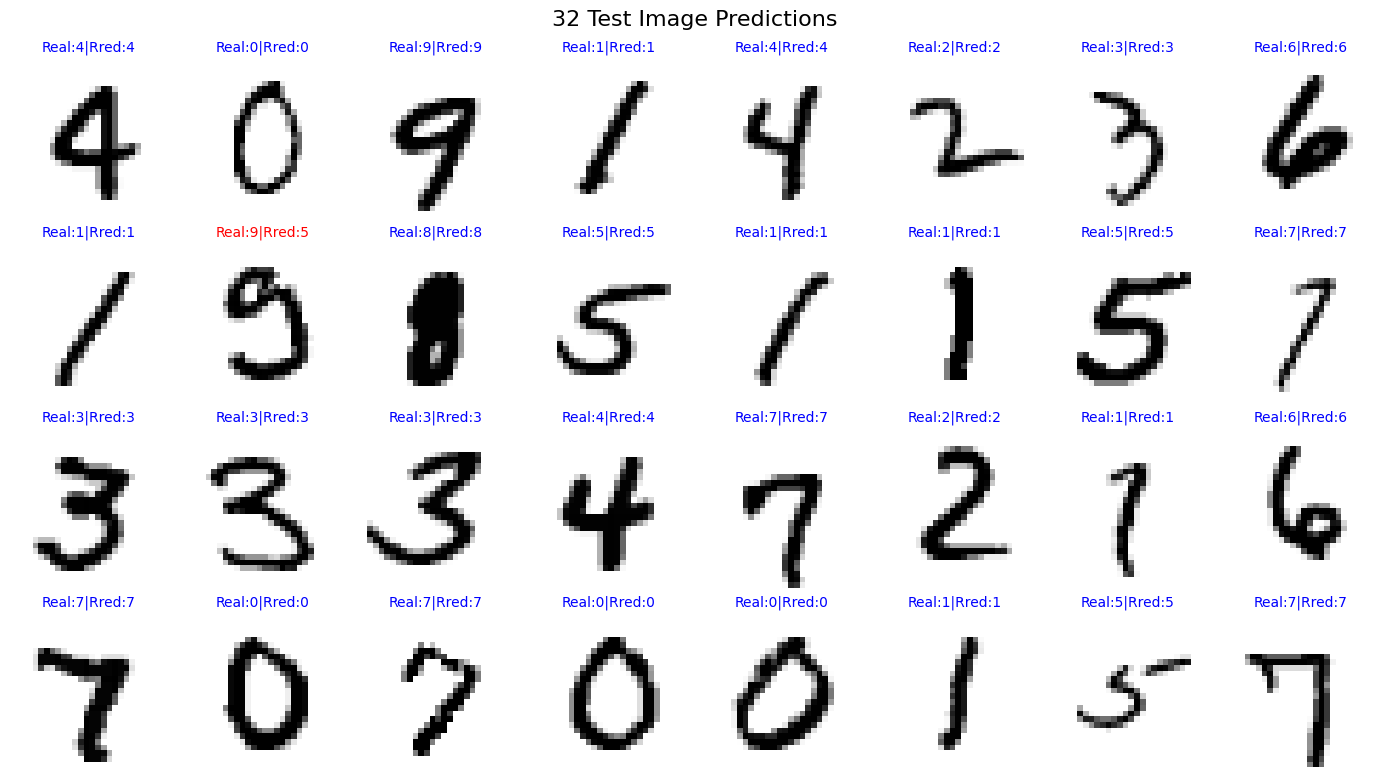

In [22]:
predicted_labels=np.argmax(predictions,axis=1)
fig,axes = plt.subplots(4,8,figsize=(14,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i].reshape(28,28),cmap='gray_r')
    ax.axis('off')
    true_label = Y_sample[i]
    pred_label = predicted_labels[i]
    ax.set_title(
        f'Real:{true_label}|Rred:{pred_label}',
        fontsize=10,
        color='blue' if true_label==pred_label else 'red'
    )
plt.suptitle('32 Test Image Predictions',fontsize=16)
plt.tight_layout()
plt.show()